<a href="https://colab.research.google.com/github/georgeduranh/ML/blob/main/3_deep_learning/Multiple_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import reuters
from keras import models, layers, optimizers
import matplotlib.pyplot as plt

from keras import regularizers
from keras.utils import to_categorical


In [ ]:
(train_data, train_labels ), (test_data, test_labels)=  reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
word_index=  dict([(value,key) for (key,value) in word_index.items()])

for _ in train_data[0]:
  print(word_index.get(_-3))

550378/550378 [==============================] - 0s 0us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [ ]:
test_labels[0]

3

In [ ]:
train_data.shape

(8982,)

In [ ]:
# Keras
#Vectorization --> one hot encoding  to use this data with Keras

def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 


x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
##Model

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(46, activation='softmax'))



In [ ]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc'],
    run_eagerly=True
)

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

In [ ]:
#saving data
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 86ms/step - loss: 3.4764 - acc: 0.2598 - val_loss: 2.7990 - val_acc: 0.5300
Epoch 2/20
16/16 [==============================] - 1s 86ms/step - loss: 2.5192 - acc: 0.4562 - val_loss: 1.8576 - val_acc: 0.5620
Epoch 3/20
16/16 [==============================] - 1s 77ms/step - loss: 1.9459 - acc: 0.5388 - val_loss: 1.5863 - val_acc: 0.6270
Epoch 4/20
16/16 [==============================] - 1s 83ms/step - loss: 1.6635 - acc: 0.5936 - val_loss: 1.4183 - val_acc: 0.6690
Epoch 5/20
16/16 [==============================] - 1s 82ms/step - loss: 1.5077 - acc: 0.6401 - val_loss: 1.3122 - val_acc: 0.7050
Epoch 6/20
16/16 [==============================] - 1s 76ms/step - loss: 1.3776 - acc: 0.6715 - val_loss: 1.2293 - val_acc: 0.7280
Epoch 7/20
16/16 [==============================] - 1s 86ms/step - loss: 1.2628 - acc: 0.6981 - val_loss: 1.1688 - val_acc: 0.7340
Epoch 8/20
16/16 [==============================] - 1s 75ms/step - loss: 1.1719 - a

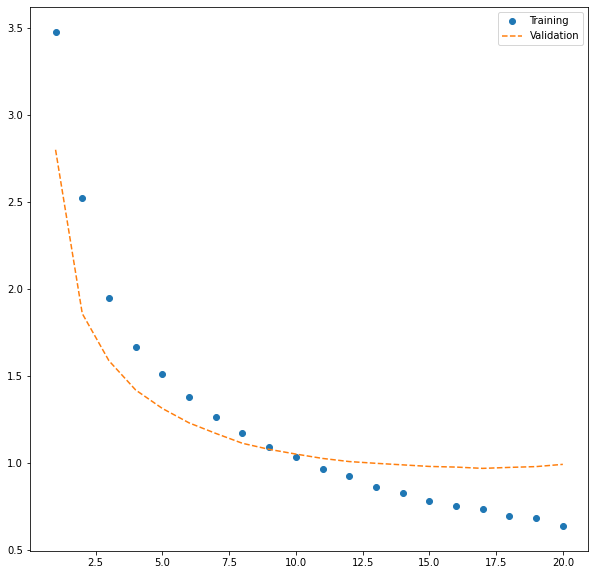

In [ ]:
#results
history_dict = history.history
loss_values = history_dict['loss']
loss_values_2 = history_dict['val_loss']

epoch = range (1, len(loss_values)+1)

fig = plt.figure(figsize=(10,10))
plt.plot(epoch, loss_values, 'o', label = 'Training')
plt.plot(epoch, loss_values_2, '--', label = 'Validation')
plt.legend()
plt.show()

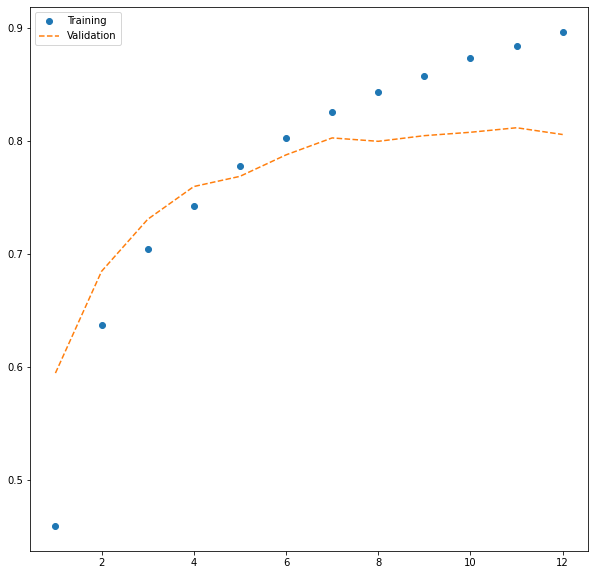

In [ ]:
#results

acc_values = history_dict['acc']
acc_values_2 = history_dict['val_acc']

epoch = range (1, len(loss_values)+1)

fig = plt.figure(figsize=(10,10))
plt.plot(epoch, acc_values, 'o', label = 'Training')
plt.plot(epoch, acc_values_2, '--', label = 'Validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 2s 22ms/step - loss: 0.9909 - acc: 0.7881


[0.990915060043335, 0.7880676984786987]

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 12ms/step


In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0])

3